<a href="https://colab.research.google.com/github/beneditomacedo/dl_notebooks/blob/master/Udemy_TensorFlow20_14_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Udemy: Tensorflow 2.0: Deep Learning and Artificial Intelligence available at: https://www.udemy.com/course/deep-learning-tensorflow-2/learn/lecture/15397338#overview

In [86]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [87]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-10-05 00:46:24--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2020-10-05 00:46:25 (41.7 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [88]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [89]:
!tail moore.csv

2017,250000000
2015,10000000000
2017,5450000000
2018,10000000000
2017,4300000000
2017,18000000000
2017,19200000000
2018,8876000000
2018,23600000000
2018,9000000000


In [90]:
data = pd.read_csv('moore.csv', header=None).values

In [91]:
print(f'data type -> {type(data)} data shape -> {data.shape}')

data type -> <class 'numpy.ndarray'> data shape -> (162, 2)


In [92]:
X = data[:,0].reshape(-1,1) # make it a 2-D array of size N, D where D = 1
Y = data[:,1]

In [93]:
print(f'X shape -> {X.shape} Y shape -> {Y.shape}')

X shape -> (162, 1) Y shape -> (162,)


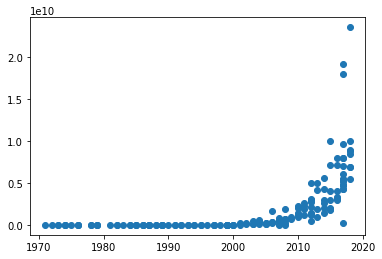

In [94]:
plt.scatter(X,Y);

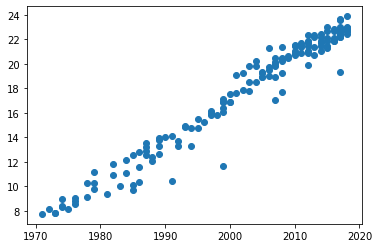

In [95]:
Y = np.log(Y)
plt.scatter(X,Y);

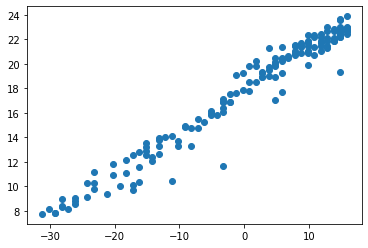

In [96]:
X = X - X.mean()
plt.scatter(X,Y);

In [97]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(1,)),
  tf.keras.layers.Dense(1)                                   
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

# learning rate scheduler

def schedule(epoch,rt):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X,Y,epochs=200,callbacks=[scheduler],verbose=0)

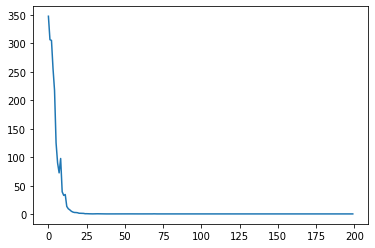

In [98]:
# plot the loss
plt.plot(r.history['loss'],label='loss')

In [99]:
a=model.layers[0].get_weights()[0][0,0]
print(a)

0.34054115


In [100]:
print(f'Time to double {np.log(2)/a}')

Time to double 2.0354285293294594


In [101]:
# Analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = (X.dot(Y) - Y.mean() * X.sum())/denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a,b)
print(f'time to double {np.log(2)/a}')

0.341682487387313 17.764939393631764
time to double 2.0286295205239204


### Making predictions

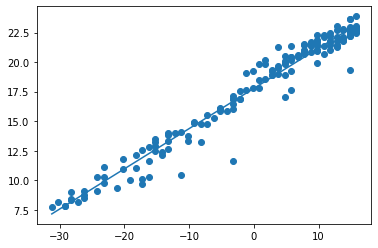

In [107]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X,Yhat)

In [112]:
# Manual calculation

# get the weights
w,b = model.layers[0].get_weights()

# reshape
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# dont use == for floating points
np.allclose(Yhat,Yhat2)

True